https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process?datasetId=6294&sortBy=voteCount


"Задача передбачати відсоток кремнеземного концентрату в руді на основі добувальних показників.
Задача регресії
Бізнес ціль - якнайточніше вимірювати відсоток концетрату"






In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Аналіз даних

###### Аналіз даних - ви повинні після завантаження проаналізувати ваші дані, подивитися на розподіл вашої цільової змінної, пошукати цікаві закономірності в даних, побудувати графіки залежності, які вам здадуться доречними. - Оцінювання 35%


In [2]:
data = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv", decimal=",", parse_dates=["date"], infer_datetime_format=True)

In [5]:
data

date  % Iron Feed  % Silica Feed  Starch Flow  \
0      2017-03-10 01:00:00        55.20          16.98      3019.53   
1      2017-03-10 01:00:00        55.20          16.98      3024.41   
2      2017-03-10 01:00:00        55.20          16.98      3043.46   
3      2017-03-10 01:00:00        55.20          16.98      3047.36   
4      2017-03-10 01:00:00        55.20          16.98      3033.69   
...                    ...          ...            ...          ...   
737448 2017-09-09 23:00:00        49.75          23.20      2710.94   
737449 2017-09-09 23:00:00        49.75          23.20      2692.01   
737450 2017-09-09 23:00:00        49.75          23.20      2692.20   
737451 2017-09-09 23:00:00        49.75          23.20      1164.12   
737452 2017-09-09 23:00:00        49.75          23.20      1164.12   

        Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
0          557.434        395.713     10.06640           1.74000   
1          563.965        397.383     10.06720           1.74000   
2          568.054        399.668     10.06800           1.74000   
3          568.665        397.939     10.06890           1.74000   
4          558.167        400.254     10.06970           1.74000   
...            ...            ...          ...               ...   
737448     441.052        386.570      9.62129           1.65365   
737449     473.436        384.939      9.62063           1.65352   
737450     500.488        383.496      9.61874           1.65338   
737451     491.548        384.976      9.61686           1.65324   
737452     468.019        384.801      9.61497           1.65310   

        Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  ...  \
0                            249.214                       253.235  ...   
1                            249.719                       250.532  ...   
2                            249.741                       247.874  ...   
3                            249.917                       254.487  ...   
4                            250.203                       252.136  ...   
...                              ...                           ...  ...   
737448                       302.344                       298.786  ...   
737449                       303.013                       301.879  ...   
737450                       303.662                       307.397  ...   
737451                       302.550                       301.959  ...   
737452                       300.355                       292.865  ...   

        Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                            250.884                    457.396   
1                            248.994                    451.891   
2                            248.071                    451.240   
3                            251.147                    452.441   
4                            248.928                    452.441   
...                              ...                        ...   
737448                       313.695                    392.160   
737449                       236.700                    401.505   
737450                       225.879                    408.899   
737451                       308.115                    405.107   
737452                       308.115                    413.754   

        Flotation Column 02 Level  Flotation Column 03 Level  \
0                         432.962                    424.954   
1                         429.560                    432.939   
2                         468.927                    434.610   
3                         458.165                    442.865   
4                         452.900                    450.523   
...                           ...                        ...   
737448                    430.702                    872.008   
737449                    404.616                    864.409   
737450                    399.316                    867.598   
737451

In [4]:
# data.info()

In [5]:
# data.describe()

In [6]:
# data.describe().transpose()

<function matplotlib.pyplot.show(close=None, block=None)>

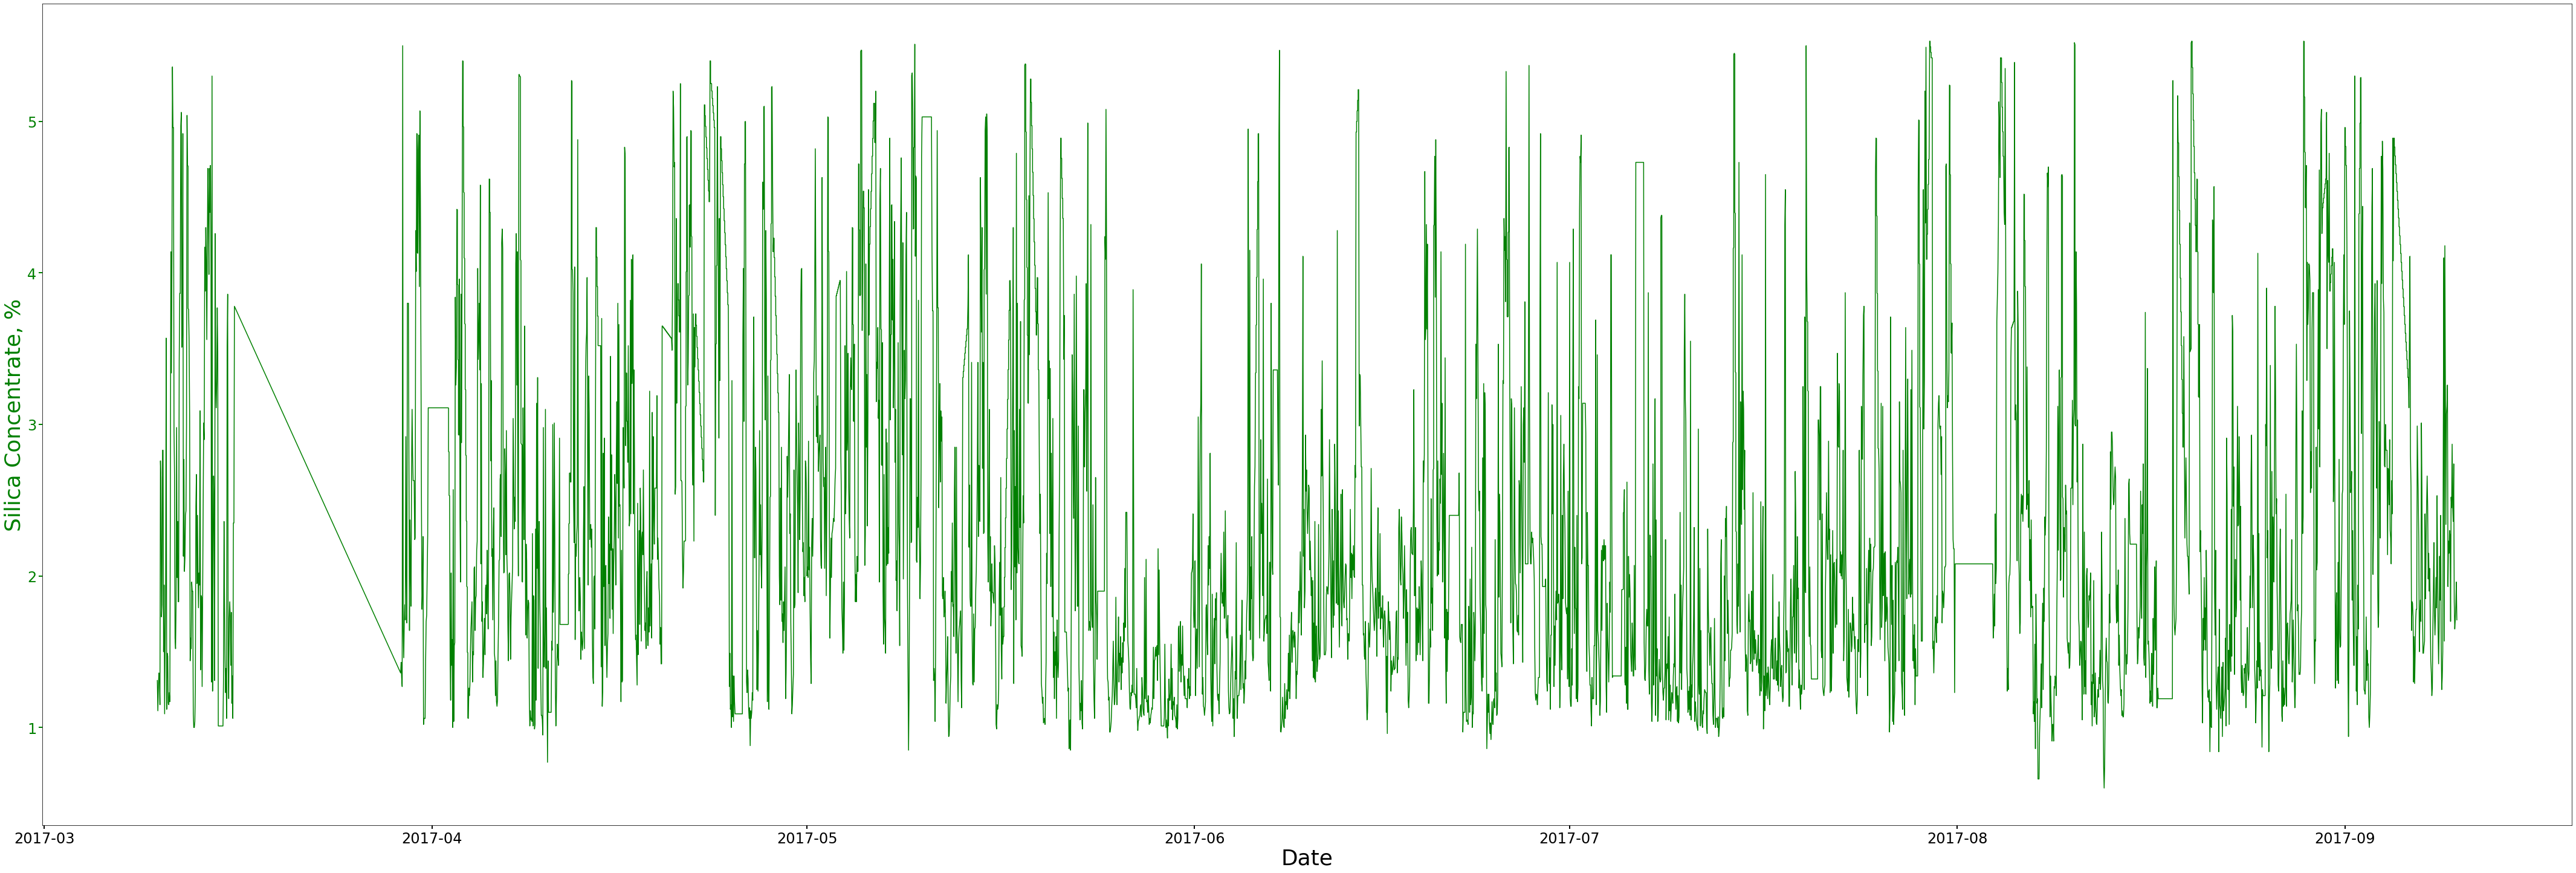

In [7]:
fig, ax = plt.subplots(figsize=(75,25))

ax.set_xlabel("Date", fontsize=36)
ax.set_ylabel("Silica Concentrate, %", color="g", fontsize=36)
ax.tick_params('y', colors="g", length=6, width=2, labelsize = 24)
ax.tick_params('x', length=6, width=2, labelsize = 24)
ax.plot(data['date'], data['% Silica Concentrate'], color="g")
plt.show

Щодо вмісту кремню спостерігаємо пробіл в даних в декількох періодах часу, один з яких є суттєвим (приблизно пів місяця).

In [8]:
data = data[data['date'] >= '2017-04-01']
# data.head()

In [9]:
# fig, ax = plt.subplots(8,3, figsize = (20,30))
# count_ = 0
# while count_ < data.shape[1]:
#     for i in range(ax.shape[0]):
#         for j in range(ax.shape[1]):
#             sns.histplot(data[data.columns[count_]], ax = ax[i][j])
#             count_ += 1

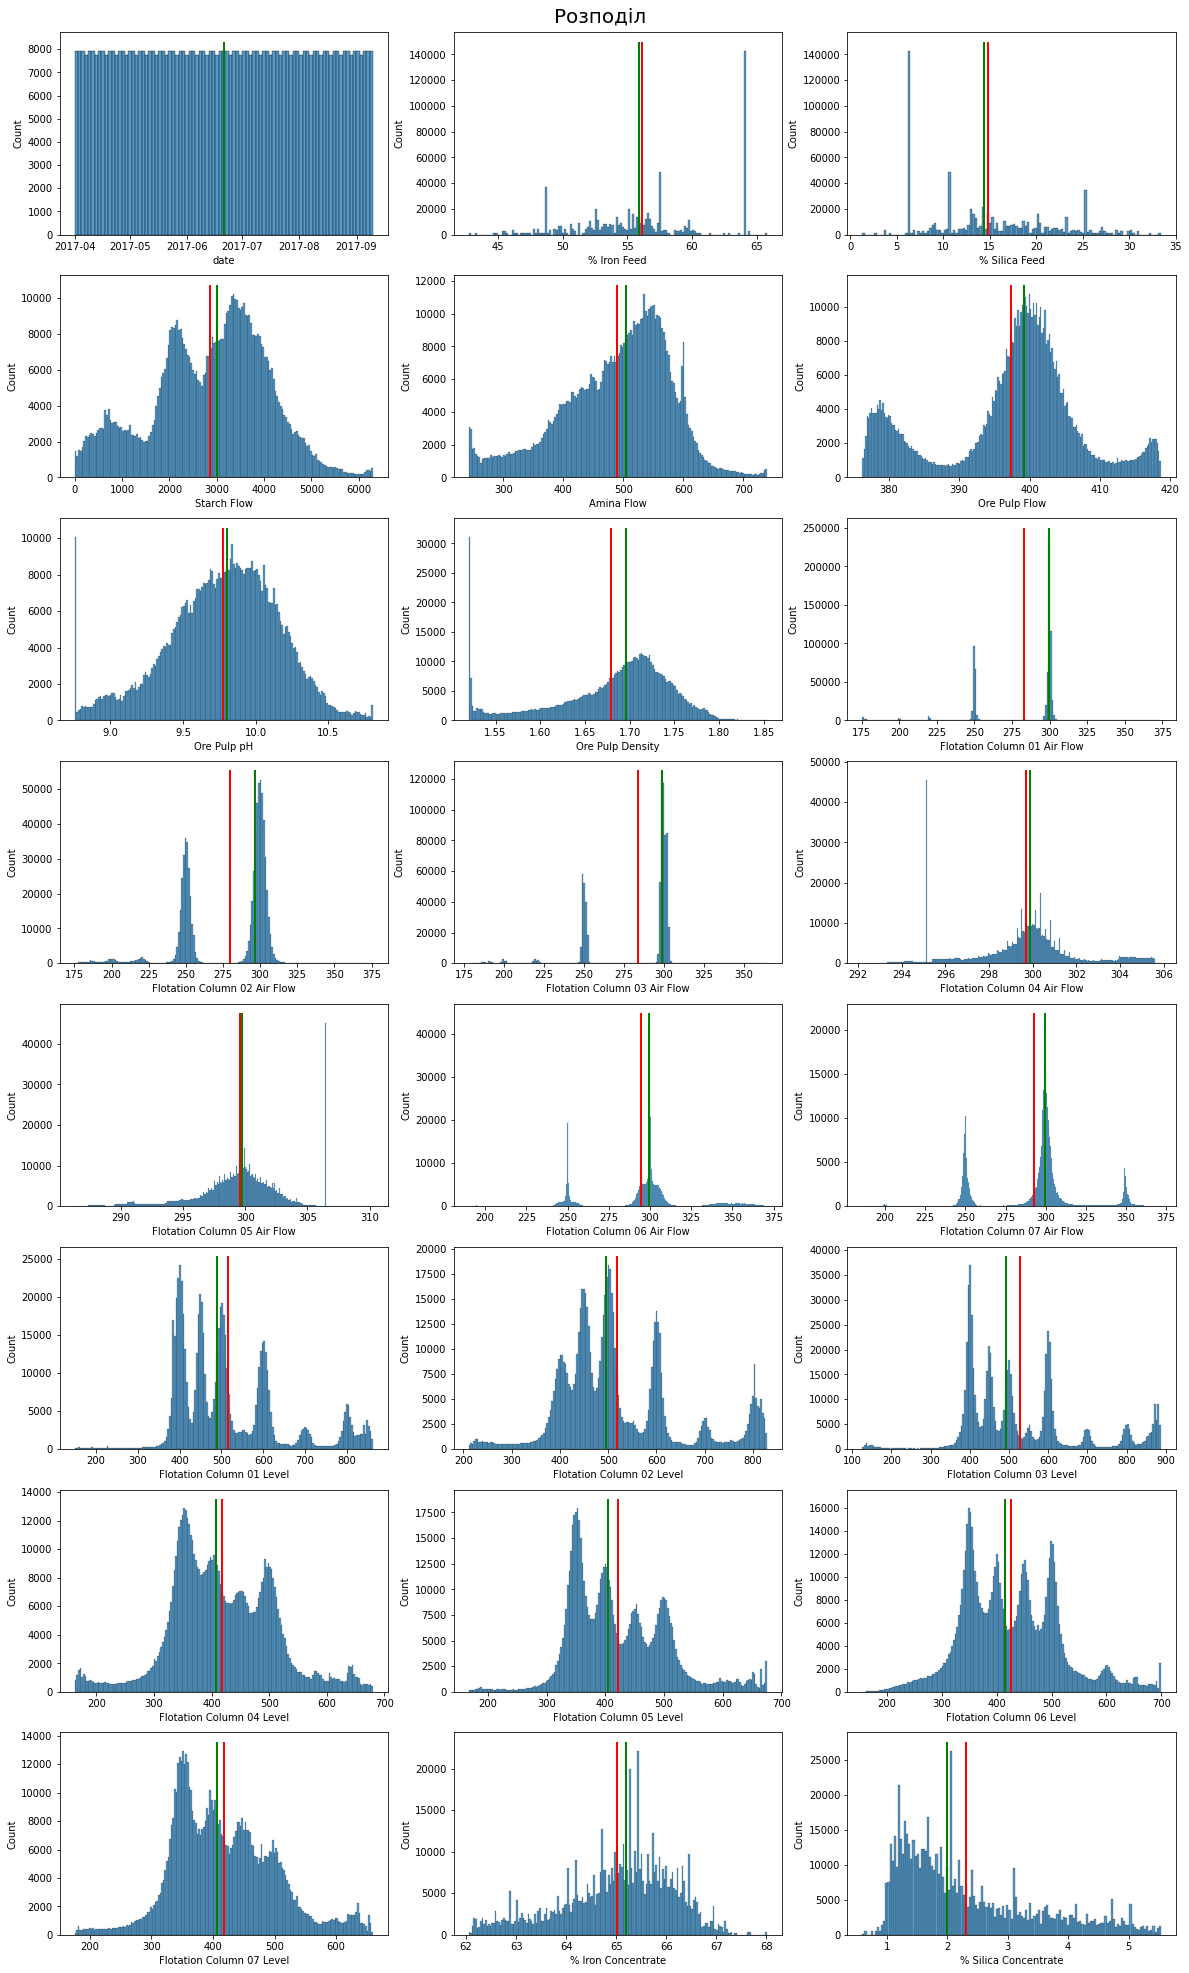

In [10]:
fig, ax = plt.subplots(8,3, figsize=(20,35))
fig.suptitle('Розподіл', fontsize = 20, y = 0.89)
count_ = 0
while count_ < data.shape[1]:
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            axes  = sns.histplot(data[data.columns[count_]], ax = ax[i][j])
            ymin, ymax = axes.get_ylim()
            _ = axes.vlines(x=data[data.columns[count_]].mean(), ymin = 0, ymax = ymax, lw =2, colors = 'r')
            _ = axes.vlines(x=data[data.columns[count_]].median(), ymin = 0, ymax = ymax, lw =2, colors = 'g')
            count_ += 1

In [11]:
################ boxplots
# fig, ax = plt.subplots(8,3, figsize=(20,35))
# count_ = 0
# columns_ = data.columns[1:]
# while count_ < len(columns_):
#     for i in range(ax.shape[0]):
#         for j in range(ax.shape[1]):
#             sns.boxplot(data = data, x = data[columns_[count_]], ax = ax[i][j])
#             ymin, ymax = axes.get_ylim()
#             count_ += 1
#             if count_ == 23:
#                 break

In [12]:
data = data.reset_index(drop = True)

In [13]:
list_dates = []
temp_day = data['date'].min()
durations = 0
for a in data['date']:
    if a <= temp_day:
        list_dates.append(a + pd.Timedelta(durations, unit = 's'))
        durations += 20
    else:
        durations = 0
        temp_day = a
        list_dates.append(a + pd.Timedelta(durations, unit = 's'))
        durations += 20

In [14]:
# len(list_dates)

699839

In [15]:
# len(pd.date_range(start = '2017-04-01 00:00:00', end = '2017-09-09 23:59:40', freq = '20S'))

699840

In [16]:
# len(list_dates) - len(pd.date_range(start = '2017-04-01 00:00:00', end = '2017-09-09 23:59:40', freq = '20S'))

-1

In [17]:
data['date_time'] = pd.Series(list_dates)
data = data.set_index(data['date_time'])
# data

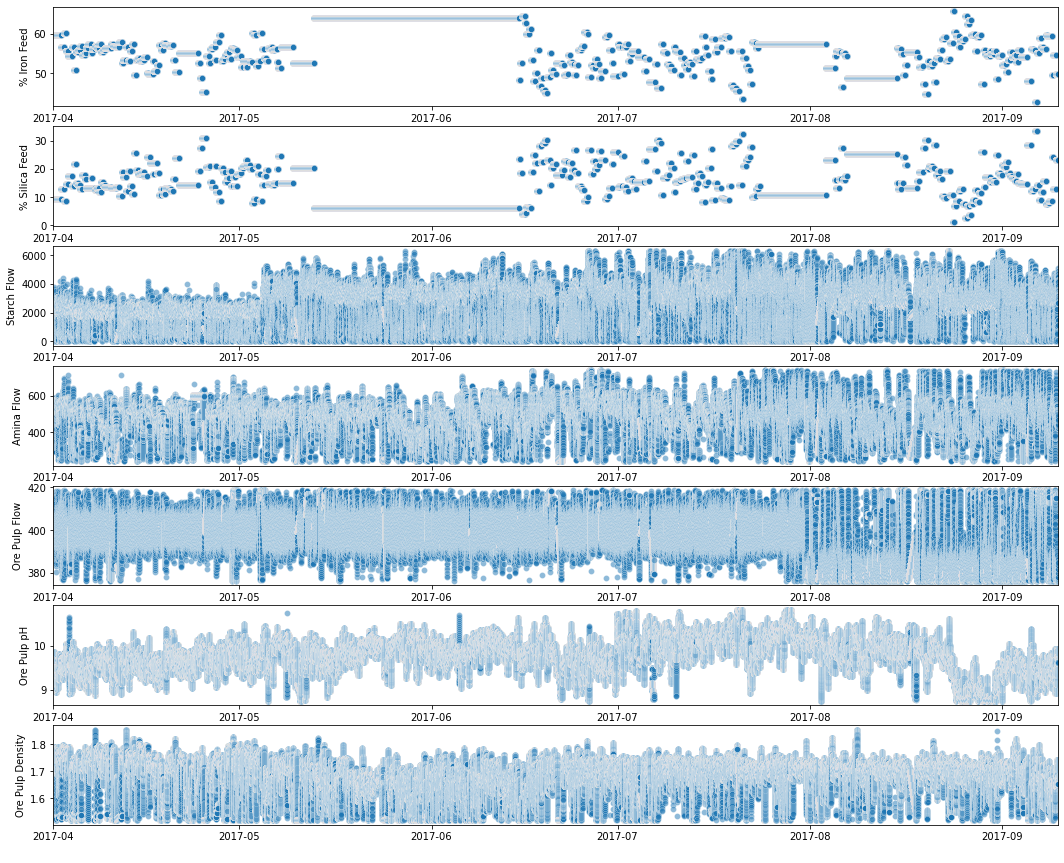

In [18]:
data_copy = data.copy()

min_date = data_copy.index.min()
max_date = data_copy.index.max()
#обираємо перелік полів для побудови графіків
columns_to_plot1 = data.columns[1:8]
count_col1 = len(columns_to_plot1)

fig, axs = plt.subplots(figsize=(18,count_col1*2.15), nrows = count_col1)

for i in range (count_col1):
    axs[i].set_xlim(min_date, max_date)
    axs[i].set_xlabel(' ')
    sns.scatterplot(data=data_copy, x = data_copy.index, y = columns_to_plot1[i], alpha = 0.5, ax = axs[i])
    plt.show

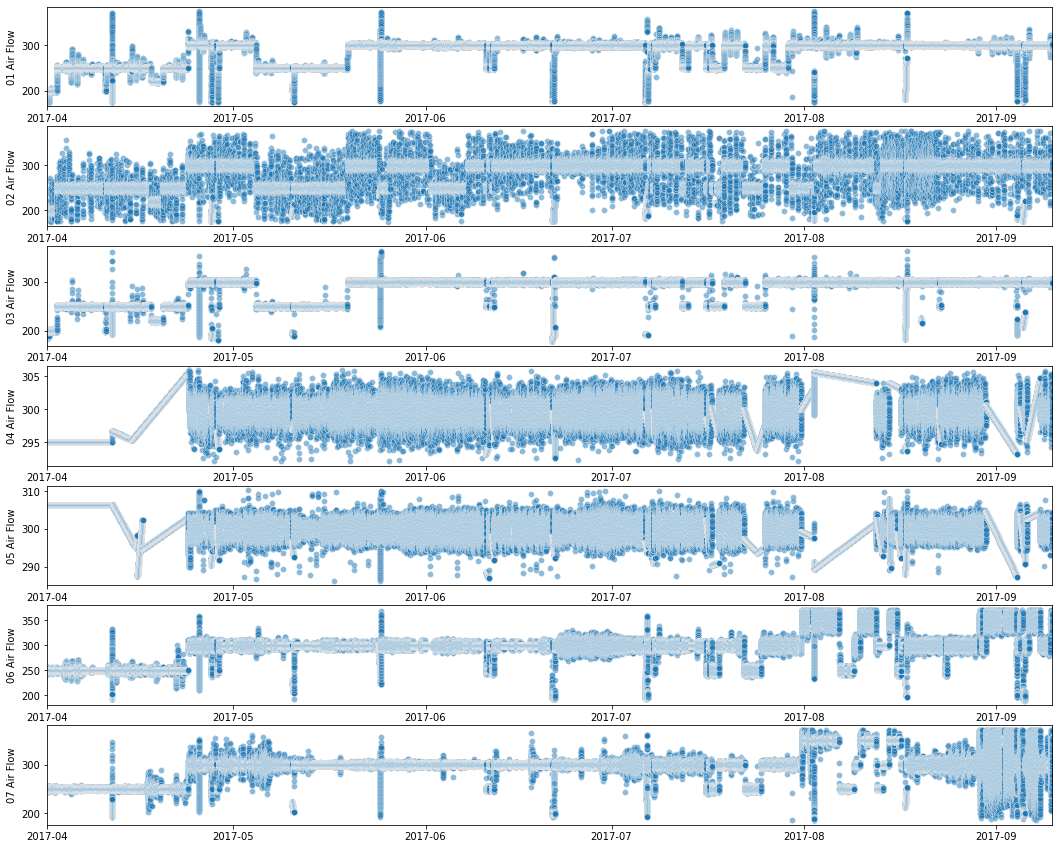

In [19]:
columns_to_plot1 = data.columns[8:15]
count_col1 = len(columns_to_plot1)

fig, axs = plt.subplots(figsize=(18,count_col1*2.15), nrows = count_col1)

for i in range (count_col1):
    axs[i].set_xlim(min_date, max_date)
    axs[i].set_xlabel(' ')
    axs[i].set_ylabel(columns_to_plot1[i][-11:])
    sns.scatterplot(data=data_copy, x = data_copy.index, y = columns_to_plot1[i], alpha = 0.5, ax = axs[i])
    plt.show

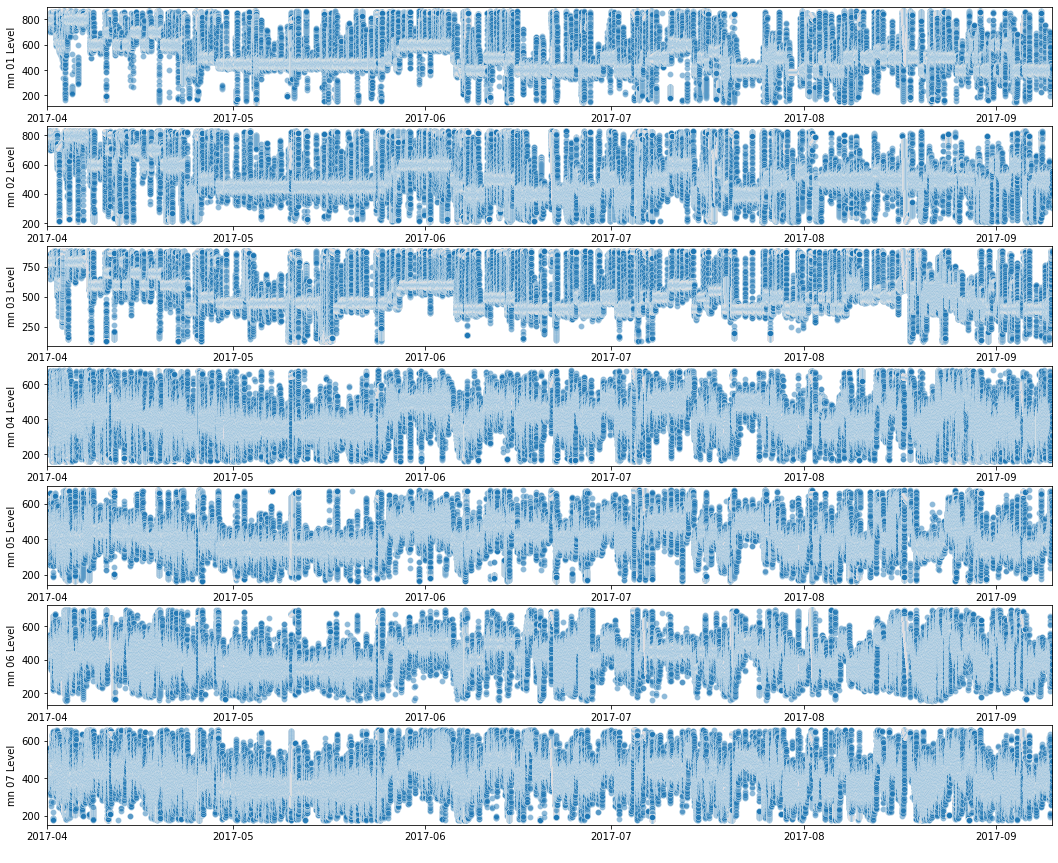

In [20]:
columns_to_plot1 = data.columns[15:22]
count_col1 = len(columns_to_plot1)

fig, axs = plt.subplots(figsize=(18,count_col1*2.15), nrows = count_col1)

for i in range (count_col1):
    axs[i].set_xlim(min_date, max_date)
    axs[i].set_xlabel(' ')
    axs[i].set_ylabel(columns_to_plot1[i][-11:])
    sns.scatterplot(data=data_copy, x = data_copy.index, y = columns_to_plot1[i], alpha = 0.5, ax = axs[i])
    plt.show

### Кореляція ознак

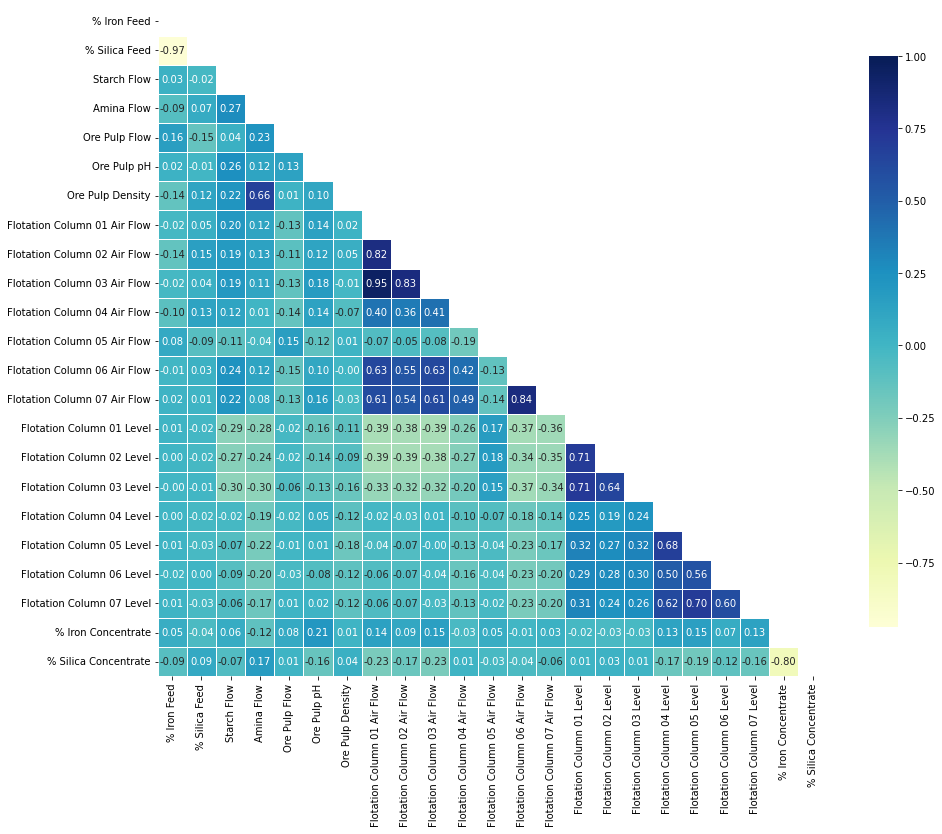

In [21]:
# Виводимо матрицю кореляцій, щоб відфільтруваті дані, що не сильно впливають на вміст кремню
def correlation_heatmap(data):
    correlations = data.corr()
    
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, mask = mask, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap = 'YlGnBu')
    plt.show()
    
correlation_heatmap(data)

### Розподіл цільової змінної

[Text(0.5, 0, 'Silica Concentrate, %')]

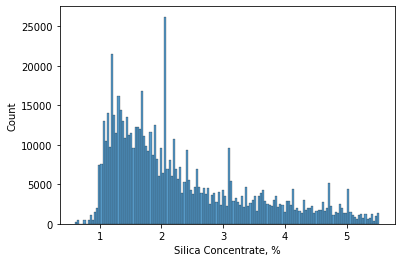

In [22]:
fig = sns.histplot(x=data['% Silica Concentrate'])
fig.set(xlabel = "Silica Concentrate, %")

Логнормальний розподіл

### Викиди в даних

[Text(0.5, 0, 'Silica Concentrate, %')]

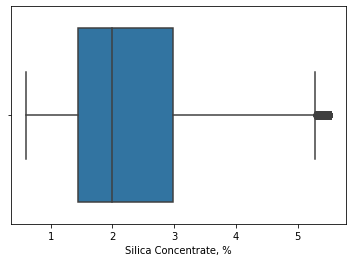

In [23]:
fig = sns.boxplot(x=data['% Silica Concentrate'])
fig.set(xlabel = "Silica Concentrate, %")

In [24]:
first_quartile, third_quartile = data['% Silica Concentrate'].describe()['25%'], data['% Silica Concentrate'].describe()['75%']
interquartile_range = third_quartile - first_quartile 

count_anomal = 0
for i in data['% Silica Concentrate']:
    if i - (1.5*interquartile_range) > third_quartile:
        count_anomal += 1
print()
print('Відсоток викидів данних:', round(count_anomal/len(data['% Silica Concentrate'])*100,3), '%')


Відсоток викидів данних: 0.892 %


Це є небагато, можна знехтувати.


In [25]:
# коефіціент асиметрії
data['% Silica Concentrate'].skew()

0.9915989225828433

### Взаємозвязок ознак

In [26]:
# відсортовуємо всі показники по залежності до вмісту кремню (зростання залежності, навіть оберненої)
silica_concentrate_corr = abs(data.corr()['% Silica Concentrate']).sort_values()

In [27]:
# data['% Silica Concentrate'].unique()

In [28]:
df =  pd.DataFrame(silica_concentrate_corr)

In [29]:
df

% Silica Concentrate
Flotation Column 03 Level                 0.006820
Ore Pulp Flow                             0.008356
Flotation Column 01 Level                 0.009116
Flotation Column 04 Air Flow              0.011325
Flotation Column 02 Level                 0.026606
Flotation Column 05 Air Flow              0.028574
Ore Pulp Density                          0.038685
Flotation Column 06 Air Flow              0.040485
Flotation Column 07 Air Flow              0.064515
Starch Flow                               0.068505
% Silica Feed                             0.086353
% Iron Feed                               0.090086
Flotation Column 06 Level                 0.117498
Ore Pulp pH                               0.155361
Flotation Column 07 Level                 0.161192
Flotation Column 04 Level                 0.166106
Amina Flow                                0.168752
Flotation Column 02 Air Flow              0.169493
Flotation Column 05 Level                 0.188309
Flotation Column 01 Air Flow              0.228793
Flotation Column 03 Air Flow              0.229921
% Iron Concentrate                        0.803068
% Silica Concentrate                      1.000000

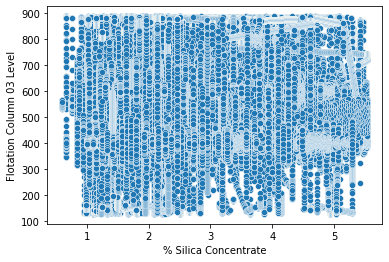

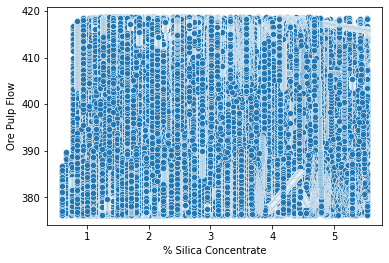

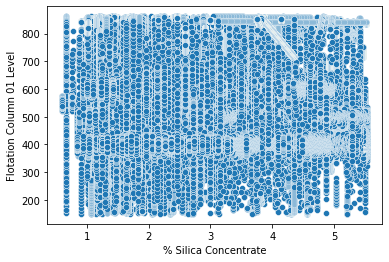

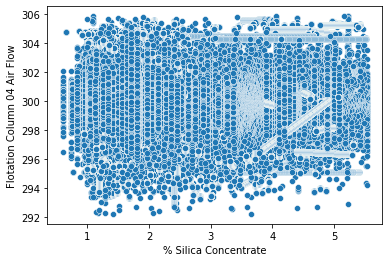

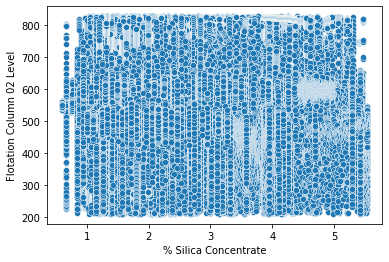

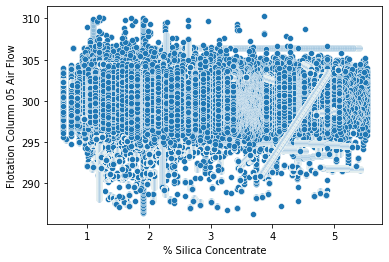

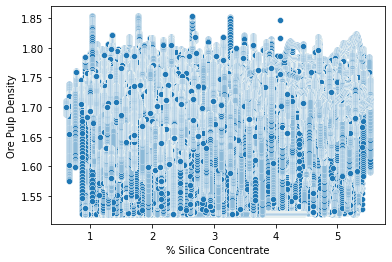

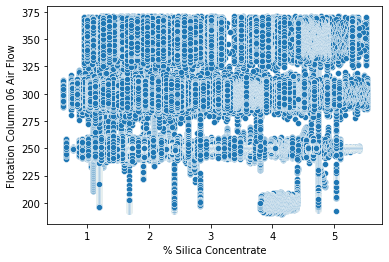

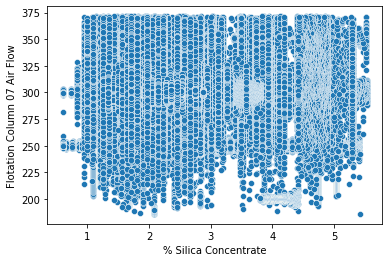

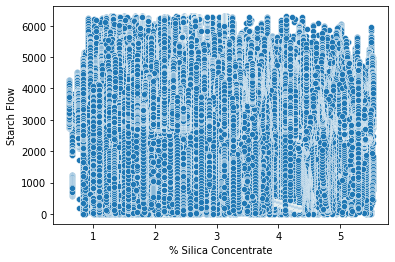

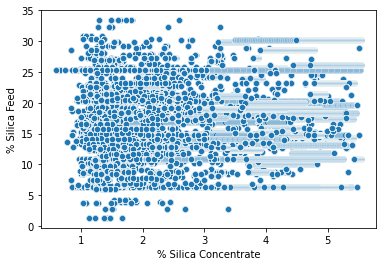

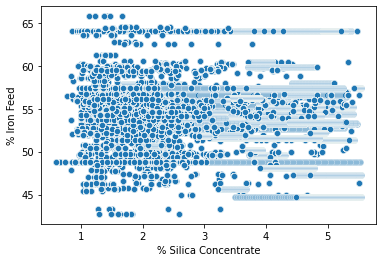

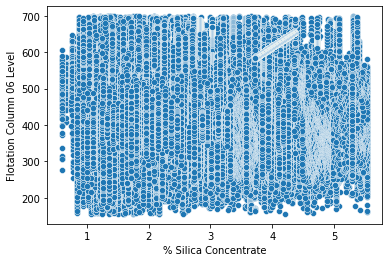

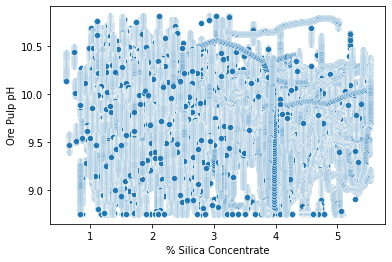

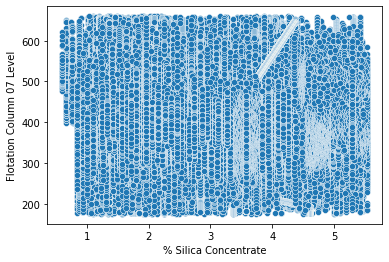

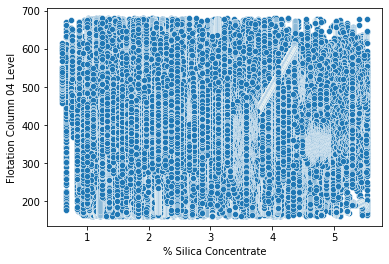

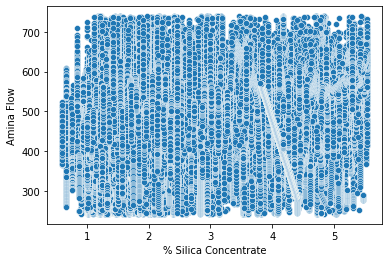

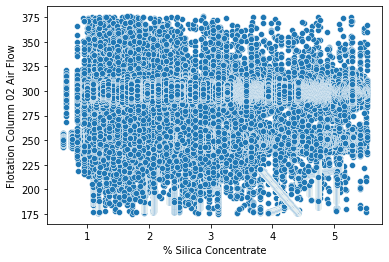

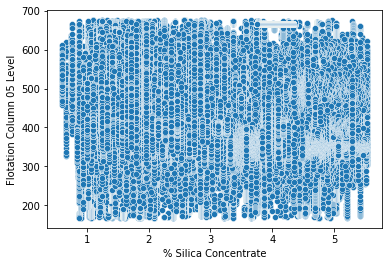

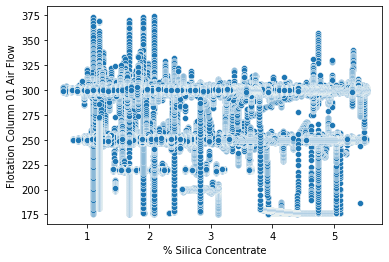

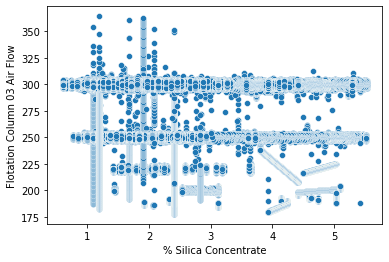

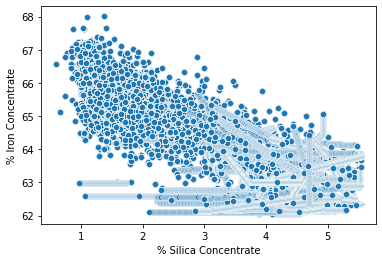

In [30]:
for i in df.drop(['% Silica Concentrate']).index:
#     fig, ax = plt.subplots(figsize=(5, 5))
    pl = sns.scatterplot(data=data, x=data['% Silica Concentrate'], y=data[i])
#     pl.set_title("Cluster's Profile Based On Income And Spending")
#     plt.legend()
    plt.show()

In [31]:
# for i in df.drop(['% Silica Concentrate']).index:
#     fig, ax = plt.subplots(figsize=(5, 5))
    
#     plt.scatter(data['% Silica Concentrate'], data[i] , marker='.', c='#9E976D') 
    
    
#     ax.set_xlim(data['% Silica Concentrate'].min(), data['% Silica Concentrate'].max()*1.2)
#     ax.set_ylim(data[i].min(), data[i].max()*1.01)
#     plt.title(f"Silica Concentrate vs. {i}")
#     plt.ylabel(f'{i}')
#     plt.xlabel('Silica Concentrate, %')
#     plt.show()

In [32]:
silica_concentrate_corr.index

Index(['Flotation Column 03 Level', 'Ore Pulp Flow',
       'Flotation Column 01 Level', 'Flotation Column 04 Air Flow',
       'Flotation Column 02 Level', 'Flotation Column 05 Air Flow',
       'Ore Pulp Density', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Starch Flow', '% Silica Feed',
       '% Iron Feed', 'Flotation Column 06 Level', 'Ore Pulp pH',
       'Flotation Column 07 Level', 'Flotation Column 04 Level', 'Amina Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 05 Level',
       'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [33]:
# відфільтровуємо 10 найбільш залежних значень
filtered_data = data.drop([i for i in silica_concentrate_corr.index[:10]], axis =1)
filtered_data.head()

date  % Iron Feed  % Silica Feed  Amina Flow  \
date_time                                                                
2017-04-01 00:00:00 2017-04-01        59.72           9.22     523.283   
2017-04-01 00:00:20 2017-04-01        59.72           9.22     520.983   
2017-04-01 00:00:40 2017-04-01        59.72           9.22     523.682   
2017-04-01 00:01:00 2017-04-01        59.72           9.22     524.413   
2017-04-01 00:01:20 2017-04-01        59.72           9.22     525.272   

                     Ore Pulp pH  Flotation Column 01 Air Flow  \
date_time                                                        
2017-04-01 00:00:00      9.45255                    176.379742   
2017-04-01 00:00:20      9.45499                    176.379320   
2017-04-01 00:00:40      9.45742                    176.378897   
2017-04-01 00:01:00      9.45985                    176.378475   
2017-04-01 00:01:20      9.46229                    176.378052   

                     Flotation Column 02 Air Flow  \
date_time                                           
2017-04-01 00:00:00                    184.619458   
2017-04-01 00:00:20                    184.622049   
2017-04-01 00:00:40                    184.624641   
2017-04-01 00:01:00                    184.627232   
2017-04-01 00:01:20                    184.629823   

                     Flotation Column 03 Air Flow  Flotation Column 04 Level  \
date_time                                                                      
2017-04-01 00:00:00                    184.292819                    461.455   
2017-04-01 00:00:20                    184.295736                    471.731   
2017-04-01 00:00:40                    184.298653                    474.609   
2017-04-01 00:01:00                    184.301570                    457.443   
2017-04-01 00:01:20                    184.304487                    437.286   

                     Flotation Column 05 Level  Flotation Column 06 Level  \
date_time                                                                   
2017-04-01 00:00:00                    476.486                    421.792   
2017-04-01 00:00:20                    472.107                    460.954   
2017-04-01 00:00:40                    469.266                    493.972   
2017-04-01 00:01:00                    462.444                    481.218   
2017-04-01 00:01:20                    454.435                    466.243   

                     Flotation Column 07 Level  % Iron Concentrate  \
date_time                                                            
2017-04-01 00:00:00                    449.983               64.03   
2017-04-01 00:00:20                    453.981               64.03   
2017-04-01 00:00:40                    447.476               64.03   
2017-04-01 00:01:00                    452.986               64.03   
2017-04-01 00:01:20                    459.457               64.03   

                     % Silica Concentrate           date_time  
date_time                                                      
2017-04-01 00:00:00                  3.11 2017-04-01 00:00:00  
2017-04-01 00:00:20                  3.11 2017-04-01 00:00:20  
2017-04-01 00:00:40                  3.11 2017-04-01 00:00:40  
2017-04-01 00:01:00                  3.11 2017-04-01 00:01:00  
2017-04-01 00:01:20                  3.11 2017-04-01 00:01:20

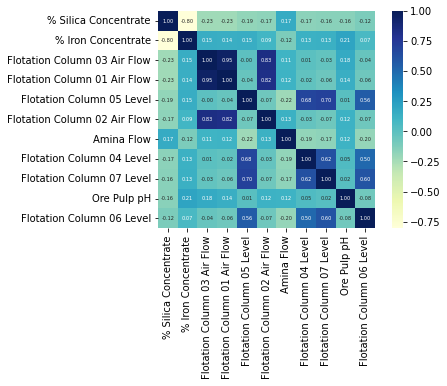

In [34]:
# Вивести матрицю кореляцій для однієї ознаки з k найбільш корельованими ознаками
col_to_check = '% Silica Concentrate'
k = 11
corr_matrix = data.corr()

max_corr_columns = abs(corr_matrix).nlargest(k, col_to_check).index

cm = filtered_data[max_corr_columns].corr()
_ = sns.heatmap(cm, cmap = 'YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=max_corr_columns.values, xticklabels=max_corr_columns.values)
plt.show()

In [35]:
# y = filtered_data['% Silica Concentrate']

In [36]:
y = data['% Silica Concentrate']

In [37]:
# x = filtered_data.drop(['% Silica Concentrate', 'date'], axis = 1)

In [38]:
x = data.drop(['% Silica Concentrate', 'date'], axis = 1)

In [39]:
# Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process.
# але в описі датасету пише, що основні показники - це колонки 4-8
print(data.columns[4:8])

Index(['Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density'], dtype='object')


# Підготовка даних

###### Підготовка даних - ви повинні вирішити проблему з пропущеними значеннями якщо вони є, перетворити категоріальні ознаки та зашкалювати дані. - Оцінювання 20%

### Пропущенні дані

<AxesSubplot:xlabel='date_time', ylabel='% Iron Feed'>

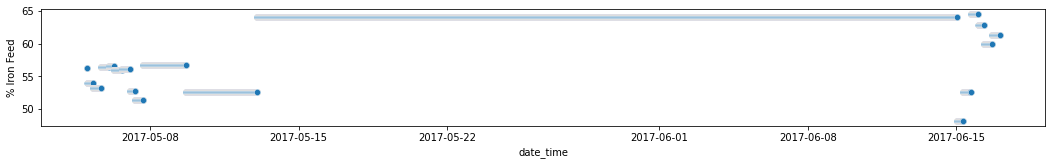

In [40]:
data_copy2 = data_copy[(data_copy['date'] >= '2017-05-05 00:00:00') & (data_copy['date'] <= '2017-06-17 00:00:00')]
fig, axs = plt.subplots(figsize=(18,2.15))
sns.scatterplot(data=data_copy2, x = data_copy2.index, y = data_copy2.columns[1], alpha = 0.5)

<AxesSubplot:xlabel='date_time', ylabel='% Iron Feed'>

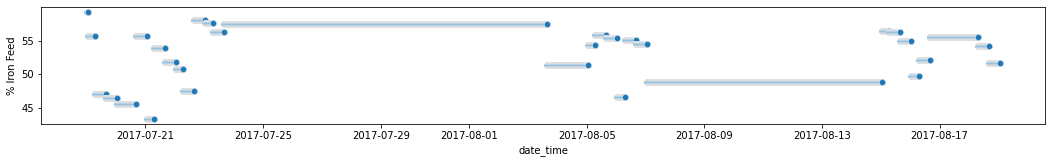

In [41]:
data_copy2 = data_copy[(data_copy['date'] >= '2017-07-19 00:00:00') & (data_copy['date'] <= '2017-08-19 00:00:00')]
fig, axs = plt.subplots(figsize=(18,2.15))
sns.scatterplot(data=data_copy2, x = data_copy2.index, y = data_copy2.columns[1], alpha = 0.5)

In [42]:
print('пропущених значень немає') if len(data) == len(data.dropna(axis = 'index')) else print('є пропущені значення')

пропущених значень немає


### Розбити дані на тренувальні та тестувальні

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape, x_test.shape

((559871, 23), (139968, 23))

In [46]:
y_train.shape, y_test.shape

((559871,), (139968,))

In [47]:
# temp_df = pd.concat([y_train.to_frame(), pd.DataFrame(X_train, columns = X_work_1.drop(['% Silica Concentrate'], axis = 1).columns).set_index(y_train.to_frame().index)], axis = 1)

# temp_df_shuf = temp_df.sample(frac = 1)
# X_train = temp_df_shuf.drop(['% Silica Concentrate'], axis = 1).values
# y_train = temp_df_shuf['% Silica Concentrate']

### Маштаб даних

In [48]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [49]:
x_train_scaled = scaler.fit_transform(x_train.drop(['date_time'], axis =1))
x_test_scaled = scaler.transform(x_test.drop(['date_time'], axis =1))

# Постановка задачі		

### Натренувати базову модель

In [50]:
# Тренуємо модель та робимо передбачення
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

In [51]:
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

### Обрати метрику

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [53]:
def print_metrics(y_test, y_pred):
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred), ' RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
    print('R2: ', r2_score(y_test, y_pred))

In [54]:
print_metrics(y_test, y_pred)

MAE:  0.4873715829684359
MSE:  0.4019278872167201  RMSE:  0.6339778286475957
MAPE:  0.24039198939538753
R2:  0.6793676937736601


In [55]:
lr.coef_

array([ 5.37569144e-01,  8.89294833e-01, -1.73168793e-01,  4.84117210e-01,
        2.01240502e-01,  4.28688431e-02, -6.63016404e-02, -1.07021134e+00,
       -2.69044742e-01, -5.35780186e-02,  1.31156614e-01,  1.12436057e-01,
        2.59359891e-03,  2.77138408e-01, -1.33659595e-01, -2.25635972e-02,
       -3.33663228e-02, -7.20107692e-02, -1.61031429e-01, -1.75024077e-01,
        2.28824755e-02, -4.61836546e+00])

In [56]:
coeff_df = pd.DataFrame(lr.coef_, x_train.drop(['date_time'], axis =1).columns, columns = ['Coefficient'])
coeff_df.style.background_gradient(cmap='YlGnBu', axis = 0)

# Моделювання

###### Моделювання - в залежності від задачі вам потірбно протестувати декілька алгоритмів (класичні підходи, дерево прийняття рішень, бустінг, можливо SVM та Баєсівські моделі і т.п.) подивитися на їх результати, спробувати погратися з гіперпараметрами моделей і описати як відпраюцвали моделі. Спробувати покращити модель за допомогою створення нових ознак та обиранням найкращих.  - Оцінювання 35%

### Спробувати змінити препроцесінг (маштабування, перетворення категорій, заміну пропущених значень)

In [57]:
std = preprocessing.StandardScaler()

In [58]:
x_train_std =std.fit_transform(x_train.drop(['date_time'], axis =1))
x_test_std = std.transform(x_test.drop(['date_time'], axis =1))

In [59]:
lr.fit(x_train_std, y_train)
y_pred = lr.predict(x_test_std)
print_metrics(y_test, y_pred)

MAE:  0.4873715829684396
MSE:  0.40192788721671957  RMSE:  0.6339778286475952
MAPE:  0.24039198939539105
R2:  0.6793676937736606


In [60]:
rob = preprocessing.RobustScaler()

In [61]:
x_train_rob =rob.fit_transform(x_train.drop(['date_time'], axis =1))
x_test_rob = rob.transform(x_test.drop(['date_time'], axis =1))

In [62]:
lr.fit(x_train_rob, y_train)
y_pred = lr.predict(x_test_rob)
print_metrics(y_test, y_pred)

MAE:  0.4873715829684348
MSE:  0.4019278872167202  RMSE:  0.6339778286475957
MAPE:  0.24039198939538634
R2:  0.6793676937736601


При зміні маштабування зміни незначні.

### пронозування часових рядів


In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [64]:
data_copy3 = data_copy[(data_copy['date'] > '2017-04-10 00:00:00')&(data_copy['date'] < '2017-05-05 00:00:00')]['% Iron Feed']

In [65]:
train = data_copy3[data_copy3.index <= pd.to_datetime ('2017-04-26 00:00:00', format = '%Y-%m-%d')]

In [66]:
train.index = pd.DatetimeIndex(train.index.values, freq = train.index.inferred_freq)

In [67]:
test = data_copy3[data_copy3.index > pd.to_datetime ('2017-04-26 00:00:00', format = '%Y-%m-%d')]

In [68]:
test.index = pd.DatetimeIndex(test.index.values, freq = test.index.inferred_freq)

##### SARIMAX

In [69]:
y = train
ARMAmodel = SARIMAX(y, order = (1,0,1))
ARMAmodel = ARMAmodel.fit()

In [70]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_data = y_pred.conf_int(alpha = 0.05)
y_pred_data['Predictions'] = ARMAmodel.predict(start = y_pred_data.index[0], end = y_pred_data.index[-1])
y_pred_data.index = test.index
y_pred_out = y_pred_data['Predictions']

RMSE:  3.527453273720471


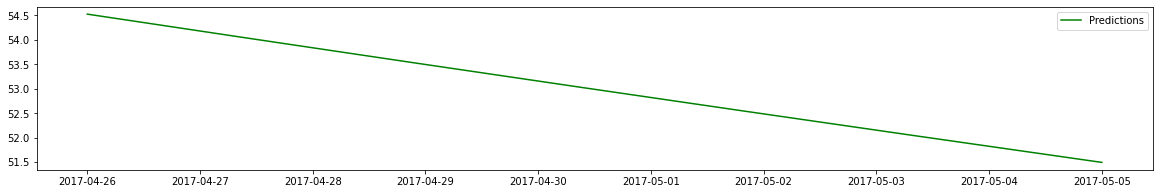

In [71]:
plt.figure(figsize= [20,3])
plt.plot(y_pred_out, color = 'green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_data['Predictions']))
print('RMSE: ', arma_rmse)

##### ARIMA

In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
ARIMAmodel = ARIMA(y, order = (5,1,0))
ARIMAmodel = ARIMAmodel.fit()

In [74]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_data = y_pred.conf_int(alpha = 0.05)
y_pred_data['Predictions'] = ARIMAmodel.predict(start = y_pred_data.index[0], end = y_pred_data.index[-1])
y_pred_data.index = test.index
y_pred_out = y_pred_data['Predictions']

RMSE:  2.6942743031143532


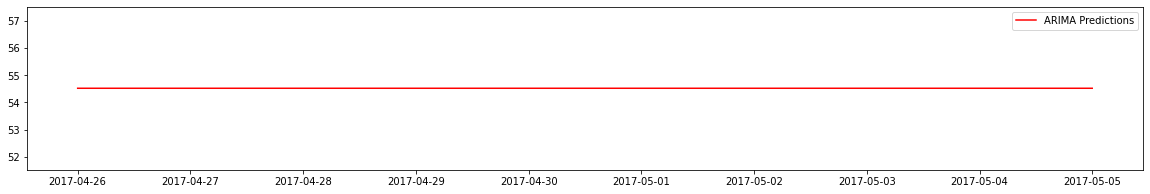

In [75]:
plt.figure(figsize= [20,3])
plt.plot(y_pred_out, color = 'red', label = 'ARIMA Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_data['Predictions']))
print('RMSE: ', arma_rmse)

##### ExponentialSmoothing

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

RMSE:  2.898226312610055


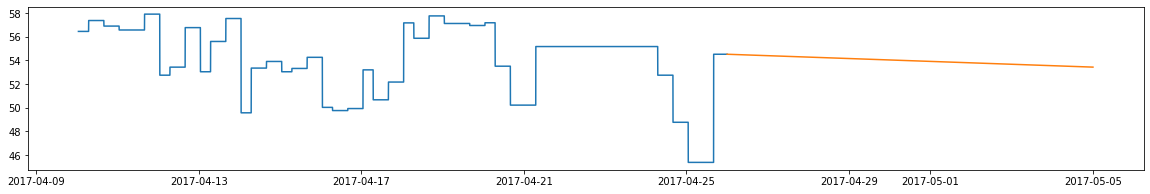

In [77]:
fit1 = ExponentialSmoothing(train, trend = 'add').fit()
plt.figure(figsize= [20,3])
plt.plot(fit1.fittedvalues)
plt.plot(fit1.forecast(len(test)))
         
rmse_pred = np.sqrt(mean_squared_error(test.values, fit1.forecast(len(test))))
print('RMSE: ', rmse_pred)

##### обираємо найкращу (за показником RMSE краща ARIMA)

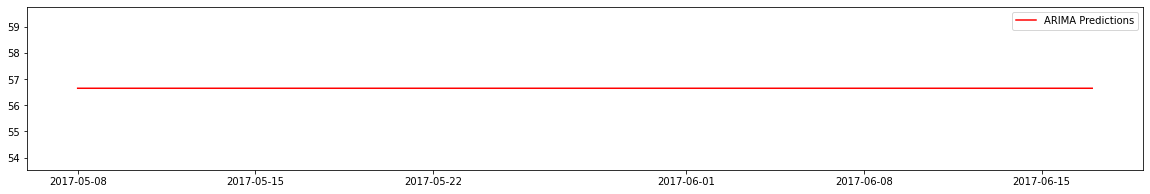

In [78]:
y = data_copy[(data_copy.index > pd.to_datetime ('2017-04-11 00:00:00', format = '%Y-%m-%d')) 
                            & (data_copy.index < pd.to_datetime ('2017-05-08 00:00:00', format = '%Y-%m-%d'))]['% Iron Feed']
y.index = pd.DatetimeIndex(y.index.values, freq = y.index.inferred_freq)

predict = data_copy[(data_copy.index > pd.to_datetime ('2017-05-08 00:00:00', format = '%Y-%m-%d')) 
                            & (data_copy.index < pd.to_datetime ('2017-06-17 00:00:00', format = '%Y-%m-%d'))]['% Iron Feed']
predict.index = pd.DatetimeIndex(predict.index.values, freq = predict.index.inferred_freq)

ARIMAmodel = ARIMA(y, order = (5,1,0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(predict.index))
y_pred_data = y_pred.conf_int(alpha = 0.05)
y_pred_data['Predictions'] = ARIMAmodel.predict(start = y_pred_data.index[0], end = y_pred_data.index[-1])
y_pred_data.index = predict.index
y_pred_out = y_pred_data['Predictions']

plt.figure(figsize= [20,3])
plt.plot(y_pred_out, color = 'red', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [79]:
pred_Iron_Feed_first = y_pred_out

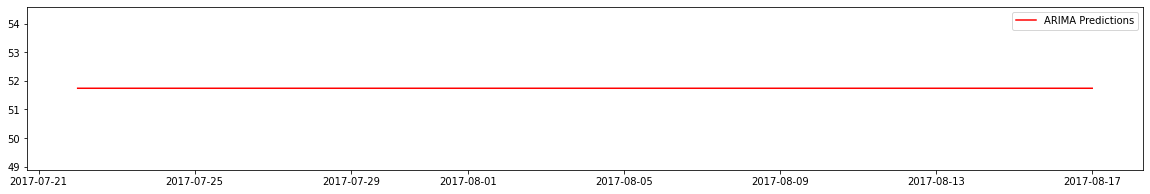

In [80]:
y = data_copy[(data_copy.index > pd.to_datetime ('2017-06-18 00:00:00', format = '%Y-%m-%d')) 
                            & (data_copy.index < pd.to_datetime ('2017-07-22 00:00:00', format = '%Y-%m-%d'))]['% Iron Feed']
y.index = pd.DatetimeIndex(y.index.values, freq = y.index.inferred_freq)

predict = data_copy[(data_copy.index > pd.to_datetime ('2017-07-22 00:00:00', format = '%Y-%m-%d')) 
                            & (data_copy.index < pd.to_datetime ('2017-08-17 00:00:00', format = '%Y-%m-%d'))]['% Iron Feed']
predict.index = pd.DatetimeIndex(predict.index.values, freq = predict.index.inferred_freq)

ARIMAmodel = ARIMA(y, order = (5,1,0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(predict.index))
y_pred_data = y_pred.conf_int(alpha = 0.05)
y_pred_data['Predictions'] = ARIMAmodel.predict(start = y_pred_data.index[0], end = y_pred_data.index[-1])
y_pred_data.index = predict.index
y_pred_out = y_pred_data['Predictions']

plt.figure(figsize= [20,3])
plt.plot(y_pred_out, color = 'red', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [81]:
pred_Iron_Feed_second = y_pred_out

In [82]:
pred_Iron_Feed = pd.concat([pred_Iron_Feed_first, pred_Iron_Feed_second])
pred_Iron_Feed = pred_Iron_Feed.to_frame()
pred_Iron_Feed = pred_Iron_Feed.rename(columns = {pred_Iron_Feed.columns[0]: '% Iron Feed PRED'})

In [83]:
pred_Iron_Feed['Prediction'] = 1

In [84]:
data_copy = data_copy.merge(pred_Iron_Feed, how = 'left', left_index=True, right_index = True)

In [85]:
data_copy['Prediction'] = data_copy['Prediction'].fillna(value = 0)


In [86]:
data_copy['% Iron Feed PRED'] = data_copy['% Iron Feed PRED'].fillna(value = 0)

In [87]:
data_copy['% Iron Feed new'] = np.where(data_copy['% Iron Feed PRED'], data_copy['% Iron Feed PRED'], data_copy['% Iron Feed'])

<AxesSubplot:xlabel='date_time', ylabel='% Iron Feed new'>

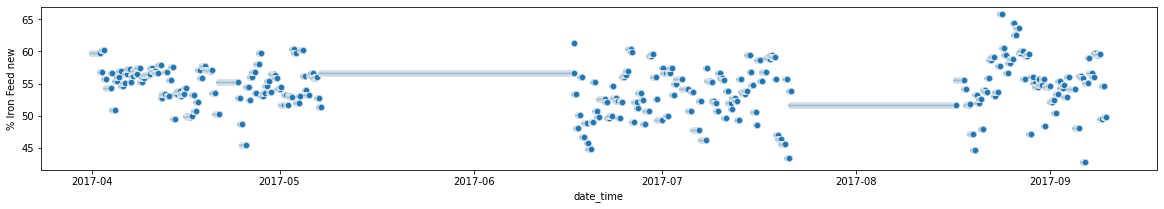

In [88]:
plt.figure(figsize = [20,3])
sns.scatterplot(data = data_copy, x = data_copy.index, y = data_copy.columns[-1], alpha = 0.5)

In [89]:
data_copy = data_copy[data_copy['date'] >= '2017-04-24 00:00:00']

### Погенерувати нові ознаки

In [90]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

data_KM = data_copy.copy()
X_work = data_KM.drop(['date','% Iron Feed','% Silica Feed','date_time','% Iron Feed PRED'], axis =1)
X_scaled = scaler.fit_transform(X_work)

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

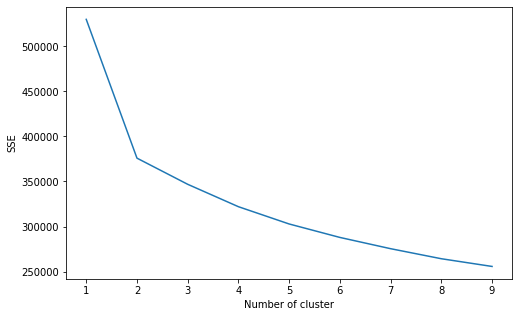

In [92]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(X_scaled)
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

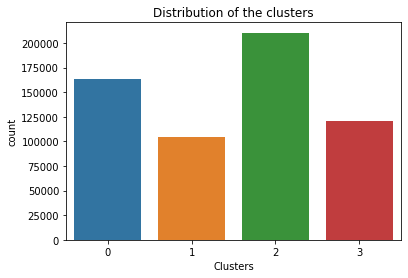

In [93]:
n_clusters = 4
k_clust = KMeans(n_clusters = n_clusters).fit(X_scaled)

y_clust = k_clust.fit_predict(X_scaled)
X_work['Clusters'] = y_clust

pl = sns.countplot(x = X_work['Clusters'])
pl.set_title('Distribution of the clusters')
plt.show()

In [94]:
pivot_clusters = X_work.groupby(['Clusters'])[X_work.columns].agg([np.mean]).transpose()
pivot_clusters.style.background_gradient(cmap = 'YlGnBu', axis = 1)

In [95]:
X_work['Prediction'] = X_work['Prediction'].astype('int')
X_work['Clusters'] = X_work['Clusters'].astype('category')

In [96]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded = pd.DataFrame(encoder.fit_transform(X_work[['Clusters']]))
encoded.columns = encoder.get_feature_names_out(['Clusters'])

In [97]:
X_work_1 = pd.concat([X_work, encoded.set_index(X_work.index)], axis = 1)
X_work_1 = X_work_1.drop(['Clusters'], axis = 1)

In [98]:
X_work_1 = pd.concat([X_work, data_KM['% Silica Concentrate']], axis = 1)

In [99]:
from sklearn.model_selection import train_test_split

df_shuffled = X_work_1.copy()
x = df_shuffled.drop(['% Silica Concentrate'], axis = 1)
y = X_work_1['% Silica Concentrate']

In [100]:
from sklearn.preprocessing import StandardScaler

scaler_ = StandardScaler()
x_scaled = scaler_.fit_transform(x)


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [102]:
temp_df = pd.concat([y_train, pd.DataFrame(x_train, columns = X_work_1.drop(['% Silica Concentrate'], axis = 1).columns).set_index(y_train.index)], axis = 1)

temp_df_shuf = temp_df 
# temp_df_shuf = temp_df.sample(frac = 1)
x_train = temp_df_shuf.drop(['% Silica Concentrate'], axis = 1).values
y_train = temp_df_shuf['% Silica Concentrate']

### Натренувати 2-3 моделі іншого типу

In [103]:
from sklearn.linear_model import MultiTaskElasticNetCV #without MultiTask ?
model_elast = MultiTaskElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], tol = 0.01)
model_elast.fit(x_train, y_train)
model_elast.l1_ratio_

1.0

In [104]:
y_pred_elast = model_elast.predict(x_test)
print_metrics(y_test, y_pred_elast)

MAE:  0.4840691336395464
MSE:  0.39769088957628146  RMSE:  0.630627377756692
MAPE:  0.24388896248381947
R2:  0.678750353850464


In [105]:
model_elast.coef_

array([[-0.03131837,  0.0766383 ,  0.03940867,  0.        , -0.00478155,
        -0.13393618, -0.04960672, -0.03893829,  0.00630169,  0.01460433,
         0.00099705,  0.05842369, -0.01397198,  0.01235532,  0.00850372,
        -0.02408979, -0.03756118, -0.05052836, -0.00310805, -0.84752302,
        -0.03685186, -0.06310237,  0.06134491],
       [-0.03131837,  0.0766383 ,  0.03940867,  0.        , -0.00478155,
        -0.13393618, -0.04960672, -0.03893829,  0.00630169,  0.01460433,
         0.00099705,  0.05842369, -0.01397198,  0.01235532,  0.00850372,
        -0.02408979, -0.03756118, -0.05052836, -0.00310805, -0.84752302,
        -0.03685186, -0.06310237,  0.06134491]])

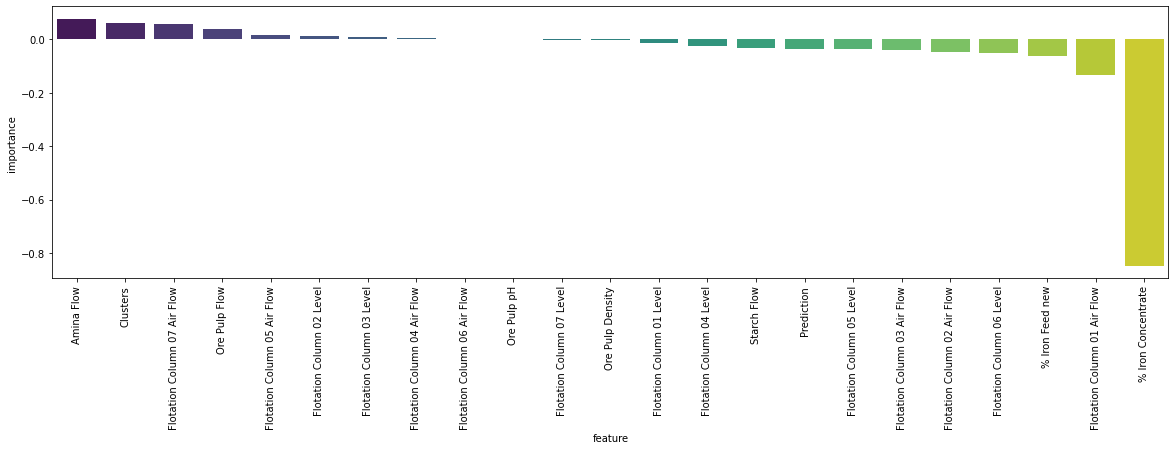

In [106]:
featureImportance = pd.DataFrame({'feature': df_shuffled.drop(['% Silica Concentrate'], axis = 1).columns, 
                                  'importance': model_elast.coef_[0] })
featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(['importance'], ascending = False, inplace = True)
plt.figure(figsize = (20,5))
sns.barplot(y=featureImportance['importance'], x = featureImportance.index, palette = 'viridis')
plt.xticks(rotation=90)
plt.show()


In [107]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [108]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

In [109]:
print_metrics(y_test, y_pred_xgb)

MAE:  0.19213960656737072
MSE:  0.07393426285690406  RMSE:  0.2719085560568186
MAPE:  0.0964570693425592
R2:  0.9402768421313019


In [110]:
# gbm_param_grid = {'learning_rate': np.arange(0.35, 1.05, .25),
#                  'max_depth': np.arange(10,20,1),
#                  'n_estimators': np.arange(100,500,100),
#                  'min_child_weight': np.arange(10,20,2)}

# gbm = xgb.XGBRegressor()
# random_mse = RandomizedSearchCV(estimator = gbm,
#                                param_distributions = gbm_param_grid,
#                                n_iter = 5,
#                                scoring = 'neg_mean_squared_error',
#                                cv = 2,
#                                verbose = 1)
# random_mse.fit(x_train, y_train)
# print('Best parameters found: ', random_mse.best_params_)
# print('Lowest RMSE found: ', np.sqrt(np.abs(random_mse.best_score_)))

In [111]:
X_work_1.columns[:-2].to_list

<bound method IndexOpsMixin.tolist of Index(['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
       'Ore Pulp Density', 'Flotation Column 01 Air Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow',
       'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
       'Flotation Column 01 Level', 'Flotation Column 02 Level',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 06 Level',
       'Flotation Column 07 Level', '% Iron Concentrate',
       '% Silica Concentrate', 'Prediction', '% Iron Feed new'],
      dtype='object')>

In [112]:
housing_dmatrix = xgb.DMatrix(data = x_train, label = y_train, feature_names = X_work_1.columns[:-2])

#Параметри, які не змінюємо
params = {'objective': 'reg:squarederror', 'max_depth':17, 'min_child_weight':12}

#Перелік показників які будуть підбиратись
learning_rate_vals = list(np.arange(0.3, 0.6, 0.05))
best_rmse = []

#Цикл з перебором параметру
for curr_val in learning_rate_vals:
    params['learning_rate'] = curr_val
    cv_results= xgb.cv(dtrain = xgb.DMatrix(data = x_train, label = y_train), params = params, nfold =3, early_stopping_rounds = 5, 
                      num_boost_round = 10, metrics = 'rmse', as_pandas = True, seed = 123)
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])
    
print(pd.DataFrame(list(zip(learning_rate_vals, best_rmse)), columns = ['learning_rate', 'best_rmse']))

   learning_rate  best_rmse
0           0.30   0.114598
1           0.35   0.097060
2           0.40   0.093072
3           0.45   0.094551
4           0.50   0.096870
5           0.55   0.100487


In [113]:
model_xgb = xgb.XGBRegressor(objective= 'reg:squarederror', n_estimators = 200,learning_rate = 0.4, min_child_weight =12,
                 max_depth = 17)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

KeyboardInterrupt: 

In [ ]:
print_metrics(y_test, y_pred_xgb)

In [ ]:
model_xgb.get_booster().feature_names = X_work_1.columns[:-2].to_list()

ax = xgb.plot_importance(model_xgb.get_booster())
fig = ax.figure
fig.set_size_inches(20,15)

### Обрати найкращу модель

Згідно метрик MSE/RMSE та MAPE кращою моделлю є XGBoost Regressor.

# Інтерпритація результатів

###### Інтерпритація результатів - вам потрібно описати, що означає досягнута метрика для бізнесу і показати що модель працює коректно на різних даних. Також буде оцінюватися ваше вміння презентувати результат - Оцінювання 10%

### Інтепритувати метрику

В описі датасету вказано, що основні показники - це колонки 4-8: 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density'.

Згідно матриці кореляцій найбільш залежними до вмісту кремню є показники 'Flotation Column 02 Air Flow', 'Flotation Column 05 Level', 'Flotation Column 01 Air Flow', 'Flotation Column 03 Air Flow', '% Iron Concentrate'.

Але модель XGBoost дає нам такі: найзалежнішими показниками є 'Ore Pulp pH', '% Iron Concentrate', 'Starch Flow', 'Amina Flow', 'Ore Pulp Density'. 

### Презентація проєкту